# Chapter V Finance

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Connecting with the Yahoo! Finance service

In [2]:
import yahoo_finance as yf

yahoo = yf.Share('YHOO')
d=yahoo.get_historical('2014-05-19', '2014-05-20')
print "A week of stock daily quotations:"
for e in d:
    print e
print "Info about the company:",yahoo.get_info()
print "Market capitalization in dollars:",yahoo.get_market_cap()

A week of stock daily quotations:
{'Volume': '18596700', 'Symbol': 'YHOO', 'Adj_Close': '33.869999', 'High': '34.470001', 'Low': '33.669998', 'Date': '2014-05-20', 'Close': '33.869999', 'Open': '33.990002'}
{'Volume': '14845700', 'Symbol': 'YHOO', 'Adj_Close': '33.889999', 'High': '33.990002', 'Low': '33.279999', 'Date': '2014-05-19', 'Close': '33.889999', 'Open': '33.41'}
Info about the company: {'start': '1996-04-12', 'symbol': 'YHOO', 'end': '2016-05-06', 'CompanyName': None}
Market capitalization in dollars: 34.78B


## Transaction volumes computation and plotting

2014-12-31 469995531.39
2014-12-30 548233280.704
2014-12-29 334735978.375
2014-12-26 262930947.17
2014-12-24 301970246.924
2014-12-23 776010280.0
2014-12-22 1228679313.04
2014-12-19 1226727000.11
2014-12-18 780903399.0
2014-12-17 857668458.888
2014-12-16 1045355762.2
2014-12-15 903361150.0
2014-12-12 1023413960.74
2014-12-11 1053743966.9
2014-12-10 796419544.816
2014-12-09 992804316.689
2014-12-08 902592743.81
2014-12-05 786168949.836
2014-12-04 611811047.0
2014-12-03 715786065.764
2014-12-02 815781900.8
2014-12-01 1159659643.71
2014-11-28 461194855.827
2014-11-26 697342005.0
2014-11-25 735437726.22
2014-11-24 758972634.287
2014-11-21 1134379334.23
2014-11-20 1481945000.0
2014-11-19 1479970858.52
2014-11-18 1389347775.0
2014-11-17 2010630897.61
2014-11-14 1491678225.0
2014-11-13 1793426700.0
2014-11-12 1546573758.87
2014-11-11 1549307983.41
2014-11-10 1221924123.0
2014-11-07 1173293260.83
2014-11-06 1084943480.0
2014-11-05 1567200356.98
2014-11-04 1179424670.1
2014-11-03 796190710.0
20

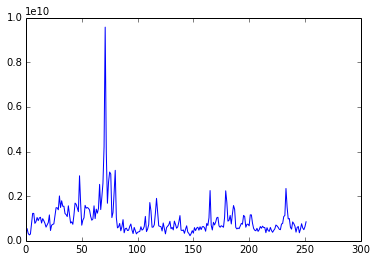

In [3]:
d=yahoo.get_historical('2014-01-01', '2014-12-31')
V = []
for s in d:
    print s['Date'],float(s['Volume'])*float(s['Adj_Close'])
    V.append(float(s['Volume'])*float(s['Adj_Close']))

plot(V)
savefig('yahoo_volume.png')

# Download NYSE tickers
### with all the information related to the market capitalization, sector and industry...
### (http://www.nasdaq.com/screening/company-list.aspx)

In [31]:
!head ./data/companylist.csv 

## Get Stock Labels, Sector and Industries

In [29]:
#this code will take approximative 1 hour to retrieve the data
#depending on the internet connection
#if you want to skip this procedure just uncomment the following lines
#import sys
#f=open("./data/list_stocks_50B_6_may_2016.txt",'r')
#list_stocks=[]
#while True:
#    next_line=f.readline()
#    if not next_line: break
#    list_stocks.append(tuple(next_line.split('\t')[:-1]))
f.close()
sys.exit(1)

import time

hfile=open("./data/companylist.csv",'r')
#we choose to get only companies with a market capitalisation
#greater than 50B$
cap_threshold=50.0 

list_stocks=[]
nextline=hfile.readline()
while True:
    nextline=hfile.readline()
    if not nextline:
        break
    line=nextline.split(',')
    sym=line[0][1:-1]
    share = yf.Share(sym)
    y_market_cap=share.get_market_cap()
    if not y_market_cap: continue
    #we will exclude stocks with char ’^’ that will
    #give errors in the query process
    if y_market_cap[-1]=='B' and float(y_market_cap \
        [:-1])>cap_threshold and line[0].find('^')==-1:
        print sym,y_market_cap
        list_stocks.append((line[0][1:-1],line[1][1:-1],\
                            line[5][1:-1],line[6][1:-1]))
    time.sleep(1)

hfile.close()

print list_stocks[0]

SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.


## Generate dictionaries for companies, sectors and colors

In [32]:
diz_sectors={}
for s in list_stocks:
    diz_sectors[s[0]]=s[2]

list_ranking=[]
for s in set(diz_sectors.values()):
    list_ranking.append((diz_sectors.values().count(s),s))

list_ranking.sort(reverse=True)

#list_colors=['red','green','blue','black''cyan','magenta','yellow'] 
list_colors=['0.0', '0.2', '0.4', '0.6','0.7', '0.8', '0.9'] 

#'white' is an extra color for 'n/a' and 'other' sectors

diz_colors={}

#association color and more represented sectors
for s in list_ranking:
    if s[1]=='n/a': 
        diz_colors[s[1]]='white'
        continue
    if list_colors==[]: 
        diz_colors[s[1]]='white'
        continue
    diz_colors[s[1]]=list_colors.pop(0)

## Retrieving historical data

In [33]:
start_period='2013-05-01'
end_period='2014-05-31'
diz_comp={}
for s in list_stocks:
    print s[0]
    stock = yf.Share(s[0])
    diz_comp[s[0]]=stock.get_historical(start_period, end_period)

#create dictionaries of time series for each company
diz_historical={}
for k in diz_comp.keys():
    if diz_comp[k]==[]: continue
    diz_historical[k]={}
    for e in diz_comp[k]:
        diz_historical[k][e['Date']]=e['Close']

for k in diz_historical.keys():
    print k,len(diz_historical[k])

MMM
ABT
ABBV
ACN
AEB
AED
AEK
BABA
MO
ABEV
AXP
AIG
BUD
AZN
T
SAN
BAC
BNS
BCS
BHP
BBL
BLK
BA
BP
BMY
BT
CX
CVX
LFC
CHL
SNP
C
CEO
KO
CL
CCV
COP
CVS
DHR
DEO
DOW
DUK
DD
LLY
EMC
E
EPD
XOM
F
GE
GSK
GS
TV
HDB
HD
HON
HSBC
HSEA
HSEB
INZ
ISF
IBM
ITUB
JPM
JNJ
LYG
LMT
LOW
MA
MCD
MDT
MRK
MTU
MS
NGG
NEE
NKE
NTT
NVS
NVO
DCM
OXY
ORCL
PEP
PTR
PFE
PM
PG
RAI
RIO
RY
SNY
SAP
SLB
SPG
STO
TSM
TEF
TMO
TWC
TWX
TJX
TD
TOT
TM
USB
UBS
UN
UL
UNP
UPS
UTX
UNH
VZ
VZA
V
WMT
DIS
WFC
WBK
UTX 273
AXP 273
BA 273
CCV 273
BT 273
BP 273
EPD 273
DCM 273
SAN 273
RY 273
ITUB 273
RAI 273
RIO 273
LYG 273
SAP 273
PFE 273
SPG 273
GS 273
BNS 273
CHL 273
WMT 273
GE 273
T 273
MRK 273
BMY 273
SNP 273
JNJ 273
SNY 273
ABEV 273
NGG 273
EMC 273
WFC 273
AEB 273
HDB 273
DEO 273
AEK 273
GSK 273
HD 273
LLY 273
CEO 273
DOW 273
HON 273
PG 273
BCS 273
PTR 273
BUD 273
PM 273
C 273
OXY 273
BLK 273
UPS 273
MA 273
INZ 273
MO 273
UL 273
UN 273
MS 273
NVO 273
TJX 273
COP 273
NEE 273
PEP 273
ACN 273
TSM 273
ISF 273
TMO 273
AZN 273
LFC 273
IBM 273
HSEA 273

## Return of prices

In [37]:
reference_company='ABEV'
diz_returns={}
d=diz_historical[reference_company].keys()
d.sort()
print len(d),d

for c in diz_historical.keys():
    #check if the company has the whole set of dates
    if len(diz_historical[c].keys())<len(d): continue
    diz_returns[c]={}
    for i in range(1,len(d)):
        #price returns
        diz_returns[c][d[i]]=math.log( \
        float(diz_historical[c][d[i]])) \
        -math.log(float(diz_historical[c][d[i-1]]))

print diz_returns[reference_company]

273 ['2013-05-01', '2013-05-02', '2013-05-03', '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10', '2013-05-13', '2013-05-14', '2013-05-15', '2013-05-16', '2013-05-17', '2013-05-20', '2013-05-21', '2013-05-22', '2013-05-23', '2013-05-24', '2013-05-28', '2013-05-29', '2013-05-30', '2013-05-31', '2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06', '2013-06-07', '2013-06-10', '2013-06-11', '2013-06-12', '2013-06-13', '2013-06-14', '2013-06-17', '2013-06-18', '2013-06-19', '2013-06-20', '2013-06-21', '2013-06-24', '2013-06-25', '2013-06-26', '2013-06-27', '2013-06-28', '2013-07-01', '2013-07-02', '2013-07-03', '2013-07-05', '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11', '2013-07-12', '2013-07-15', '2013-07-16', '2013-07-17', '2013-07-18', '2013-07-19', '2013-07-22', '2013-07-23', '2013-07-24', '2013-07-25', '2013-07-26', '2013-07-29', '2013-07-30', '2013-07-31', '2013-08-01', '2013-08-02', '2013-08-05', '2013-08-06', '2013-08-07', '2013-08-08', '2013-08-09', '

## Basic Statistics and the Correlation Coefficient

In [38]:
#mean
def mean(X):
    m=0.0
    for i in X:
        m=m+i
    return m/len(X)

#covariance
def covariance(X,Y):
    c=0.0
    m_X=mean(X)
    m_Y=mean(Y)
    for i in range(len(X)):
        c=c+(X[i]-m_X)*(Y[i]-m_Y)
    return c/len(X)

#pearson correlation coefficient
def pearson(X,Y):
    return covariance(X,Y)/(covariance(X,X)**0.5 * \
                            covariance(Y,Y)**0.5)

## Correlation of price returns

In [39]:
def stocks_corr_coeff(h1,h2):
    l1=[]
    l2=[]
    intersec_dates=set(h1.keys()).intersection(set(h2.keys()))
    for d in intersec_dates:
        l1.append(float(h1[d]))
        l2.append(float(h2[d]))
    return pearson(l1,l2)

#correlation with the same company has to be 1!
print stocks_corr_coeff(diz_returns[reference_company], \
                        diz_returns[reference_company])

1.0


## Build the correlation Network

In [40]:
import math
import networkx as nx

corr_network=nx.Graph()

num_companies=len(diz_returns.keys())
for i1 in range(num_companies-1):
    for i2 in range(i1+1,num_companies):
        stock1=diz_returns.keys()[i1]
        stock2=diz_returns.keys()[i2]
        #metric distance
        metric_distance=math.sqrt(2*(1.0-stocks_corr_coeff\
                (diz_returns[stock1],diz_returns[stock2])))
        #building the network
        corr_network.add_edge(stock1, stock2, weight=metric_distance)

print "number of nodes:",corr_network.number_of_nodes()
print "number of edges:",corr_network.number_of_edges()

number of nodes: 117
number of edges: 6786


In [ ]:
number of nodes: 123
number of edges: 7503

## Minimum Spanning Tree with ([Prim's algorithm](http://en.wikipedia.org/wiki/Prim%27s_algorithm))

In [41]:
tree_seed=reference_company
N_new=[]
E_new=[]
N_new.append(tree_seed)
while len(N_new)<corr_network.number_of_nodes():
    min_weight=10000000.0
    for n in N_new:
        for n_adj in corr_network.neighbors(n):
            if not n_adj in N_new:
                if corr_network[n][n_adj]['weight']<min_weight:
                    min_weight=corr_network[n][n_adj]['weight']
                    min_weight_edge=(n,n_adj)
                    n_adj_ext=n_adj
    E_new.append(min_weight_edge)
    N_new.append(n_adj_ext)

#generate the tree from the edge list
tree_graph=nx.Graph()
tree_graph.add_edges_from(E_new)

#setting the color attributes for the network nodes
for n in tree_graph.nodes():
    tree_graph.node[n]['color']=diz_colors[diz_sectors[n]]

## Printing the Financial Minimum Spanning Tree

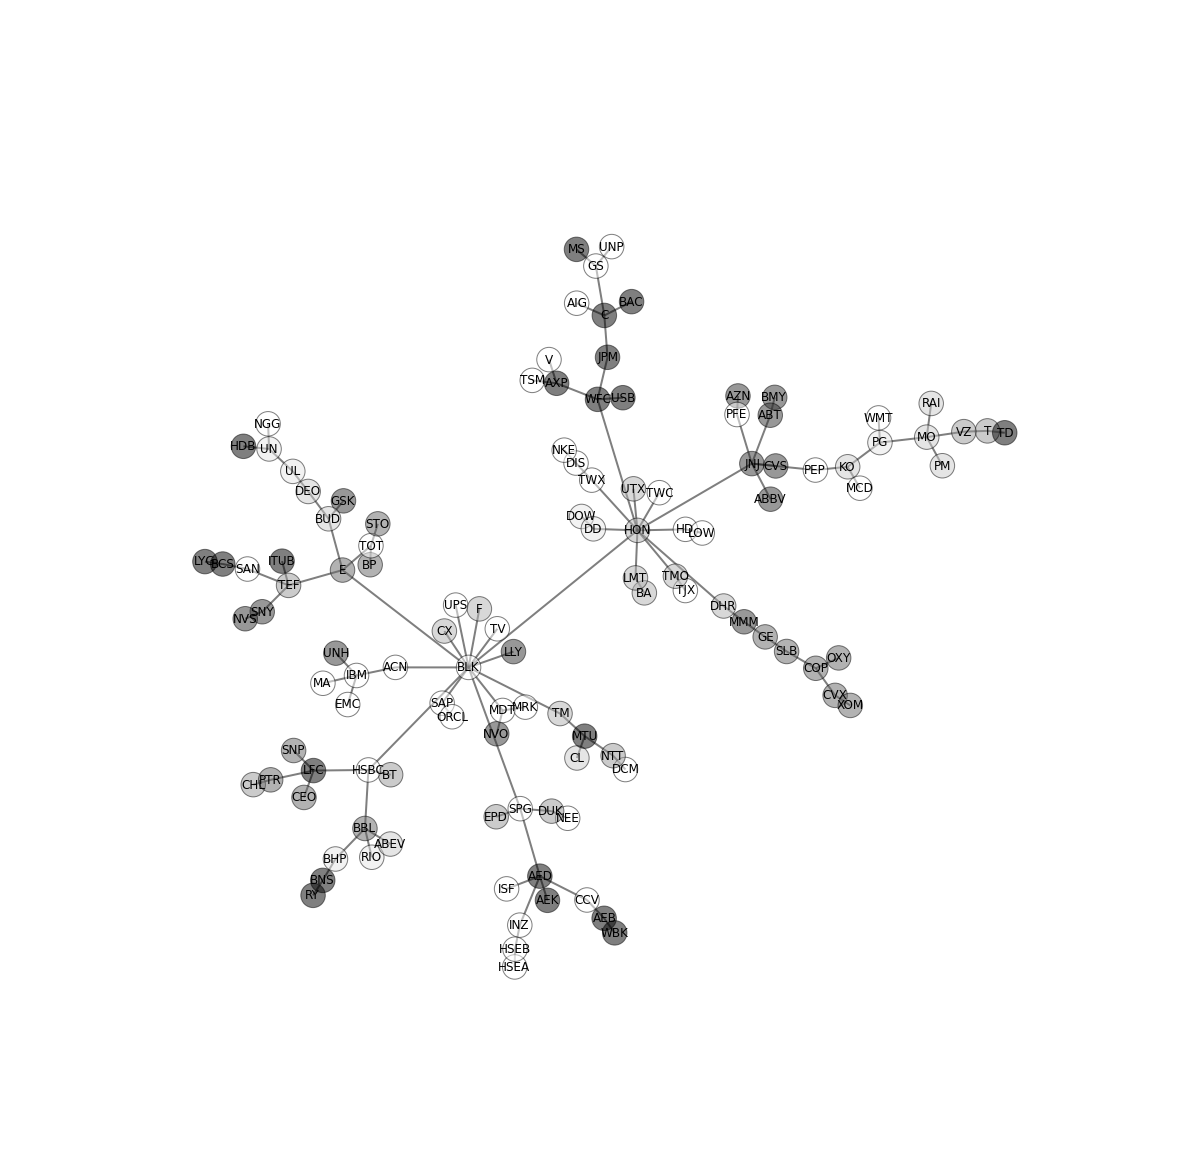

In [51]:
pos=nx.graphviz_layout(tree_graph,prog='neato', \
                       args='-Gmodel=subset -Gratio=fill')

figure(figsize=(20,20))
nx.draw_networkx_edges(tree_graph,pos,width=2, \
                       edge_color='black', alpha=0.5, style="solid")
nx.draw_networkx_labels(tree_graph,pos)
for n in tree_graph.nodes():
    nx.draw_networkx_nodes(tree_graph, pos, [n], node_size = 600, \
    alpha=0.5, node_color = tree_graph.node[n]['color'], \
    with_labels=True)

axis('off')

savefig('./data/MST_50B_new.png',dpi=600)